In [4]:
import pandas as pd
import os
import cv2
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

C:\Users\SURYAVEERENDRA\AppData\Local\Temp\ipykernel_20560\1309084500.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
# Directory containing images
dir1 = r"C:\Users\SURYAVEERENDRA\petimages"
categories = ['cats', 'dogs']
data = []

In [13]:
import os
# Load and preprocess images
for category in categories:
    path = os.path.join(dir1, category)
    label = category
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        try:
            pet_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            pet_img = cv2.resize(pet_img, (64, 64))
            image = pet_img.flatten()
            data.append([image, label])
        except Exception as e:
            print(f"Error processing {img_path}: {e}")


In [14]:

# Save processed data
with open('data.pkl', 'wb') as pick_in:
    pickle.dump(data, pick_in)

# Load data and shuffle
with open('data.pkl', 'rb') as pick_in:
    data = pickle.load(pick_in)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.2s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=auto

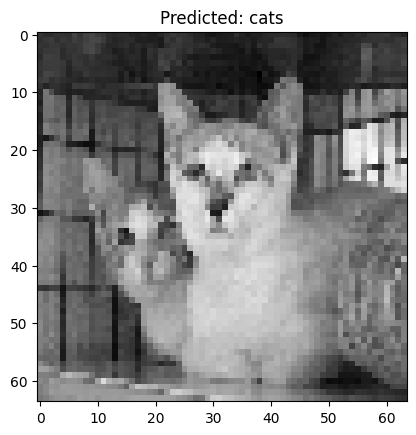

In [15]:

random.shuffle(data)

# Separate features and labels
features = np.array([item[0] for item in data])
labels = np.array([item[1] for item in data])

# Scale features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [1, 5, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=3, verbose=2)
grid_search.fit(x_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Improved Accuracy: {accuracy:.4f}")
print(classification_report(y_test, predictions))

# Display a sample prediction
sample_index = 30
sample_image = x_test[sample_index].reshape(64, 64)
predicted_label = best_model.predict([x_test[sample_index]])[0]
plt.title(f"Predicted: {predicted_label}")
plt.imshow(sample_image, cmap='gray')
plt.show()
